In [435]:
# common imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time 
from tqdm import tqdm

# sklearn imports
import sklearn
from sklearn import datasets
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix, r2_score, accuracy_score, f1_score

In [436]:
# Neural Network Imports 
import torch
import torch.nn as nn

In [437]:
def Sigmoid_python(y_pred):
    probability = 1/(1+np.e**-y_pred)
    return probability

In [438]:
def softmax_python(output):
    # print(output.shape)
    z = np.e**output
    probabilities = np.array( [x/sum(x) for x in z] )
    return probabilities

In [439]:
def Cross_Entropy_Loss(y_label, y_pred):

    log_prob = np.log(y_pred)
    # calculating the Cross_Entropy_Loss
    loss = -sum([np.dot(log_prob[i],y_label[i]) for i in range(150)])

    # print(loss,y_pred[0])

    return loss

In [440]:
def BCE_Loss(y_label, y_pred):

    log_prob_1 = np.log(y_pred)
    log_prob_2, label2 = np.log(1-y_pred), 1-y_label

    # print(f" shape of the log_prob_1 :{log_prob_1.shape} \n shape of the log_prob_2 :{log_prob_2.shape} \n shape of the y_label :{y_label.shape} \n {np.dot(y_label,log_prob_1)}")
    # Shape of y_pred is (1 x m) and Shape of y_label is (m x 1)
    loss = - ( y_label@log_prob_1 + label2@log_prob_2 )
    # print(loss, loss.shape)


    return loss

In [441]:
def Sigmoid_BCE_Grad(x,y,y_pred):

    w_grad = -( x.transpose()@(y-y_pred.reshape(-1)) / len(x) )
    b_grad = -np.mean(y-y_pred.reshape(-1))

    w_grad = w_grad.reshape((w_grad.shape[0],1))

    # print(w_grad.shape, b_grad, y,y_pred)
    # lab

    return w_grad, b_grad

In [442]:
def Softmax_CE_Grad(x,y,y_pred):

    w_grad = -( x.transpose()@(y-y_pred) / len(x) )
    b_grad = -np.mean(y-y_pred,axis=0)

    # w_grad = w_grad.reshape((w_grad.shape[0],1))

    # print(w_grad.shape, b_grad.shape,)
    # lab

    return w_grad, b_grad

## Common Template for training

Common Template, can be used for both problems Numpy Implementation

In [443]:
class numpy_logistic():

    def __init__(self, data, name):
        self.data = data
        self.name = name
    
    def prepare_data(self, normalize = False, iris=False):
        
        if not iris:
            self.x = self.data[:,:-1]
            self.y = self.data[:,-1]
            self.normalize = normalize

        # Iris data has different structure
        else:
            self.x = self.data[0]
            self.y = self.data[1]

            if normalize:
                # getting the std and mu of the data
                mu = np.mean(self.x, axis = 0)
                std = np.std(self.x, axis = 0)
                self.x = ( self.x - mu ) / (std)
    
    def train_regressor(self, loss_fn, classification_fn , gradient_fn, epochs=10, lr=1e-1, print_enabled=False ):
        # random initialization of weights
        loss_list = []
        k = 1 if len(self.y.shape) == 1 else  self.y.shape[1]
        w = np.random.randn(self.x.shape[1], k)
        bias = np.random.randn(k)

        for e in tqdm(range(epochs)):

            y_pred = self.x@w + bias
            y_pred = classification_fn(y_pred)

            # print( w, bias)

            # calculating loss here:
            loss = loss_fn(self.y, y_pred)

            # performing GD here
            w_grad, bias_grad =  gradient_fn(self.x,self.y,y_pred)

            # weight update
            w = w - lr*w_grad
            bias = bias - lr*bias_grad

            # print(w,bias)

            # appending loss to the list
            loss_list.append(loss)

        if print_enabled:
            print(f" Learning_rate : {lr} and no.of epochs : {epochs} a self.x_normalized : {self.normalize}")
            print(f" Final Train loss (MSE) is : {loss_list[-1]:.4f}  ")
        
        self.w = w
        self.bias = bias
        self.loss_list = loss_list

        return loss_list  

    def draw_graph(self, classification_fn=softmax_python):

        plt.figure(figsize=(6,6))
        plt.plot(self.loss_list, label=f'{self.name} loss')
        plt.xlabel('epochs')
        plt.ylabel('loss')
        plt.legend(loc='best')
        plt.show()

        if self.x.shape[1] < 3:
            print(f' x and y weights : {self.w[0], self.w[1]}' )
            x = np.linspace(-0.5,1.5,100)
            y = -( self.w[0]*x) - self.bias
            y = y/self.w[1] 
            
            plt.figure(figsize=(6,6))
            sns.scatterplot(x = self.x[:,0], y = self.x[:,1], hue=self.y)
            plt.plot(x,y,'g-')
            plt.show()

        else:
            plt.figure(figsize=(7,7))
            labels = ['setosa', 'versicolor', 'virginica']

            y_true = np.argmax(self.y,axis=1)
            y_pred = self.x@self.w + self.bias
            y_pred = np.argmax( classification_fn(y_pred) , 1)

            print(f" Accuracy of our current classifier is : {accuracy_score(y_true,y_pred)*100:.2f} %")
            plt.title('Confusion Matrix')
            cm = confusion_matrix(y_true, y_pred, normalize='true')
            sns.heatmap(cm, xticklabels=labels, yticklabels=labels, annot=True)
            plt.show()

# Question - 1

In [444]:
OR_data = np.array([[x,y,bool(x+y)] for x in [0,1] for y in [0,1]])
AND_data = np.array([[x,y,bool(x*y)] for x in [0,1] for y in [0,1]])
XOR_data = np.array([[x,y,bool(bool(x+y) - x*y)] for x in [0,1] for y in [0,1]])

In [445]:
print(f" The OR data is : \n {OR_data}\n")
print(f" The AND data is : \n {AND_data}\n")
print(f" The XOR data is : \n {XOR_data}\n")

 The OR data is : 
 [[0 0 0]
 [0 1 1]
 [1 0 1]
 [1 1 1]]

 The AND data is : 
 [[0 0 0]
 [0 1 0]
 [1 0 0]
 [1 1 1]]

 The XOR data is : 
 [[0 0 0]
 [0 1 1]
 [1 0 1]
 [1 1 0]]



## OR data

In [446]:
OR_numpy = numpy_logistic(OR_data, 'OR_Gate')
OR_numpy.prepare_data()

In [447]:
loss = OR_numpy.train_regressor(BCE_Loss, Sigmoid_python, Sigmoid_BCE_Grad, lr = 1e-1, epochs = 1000)

100%|██████████| 1000/1000 [00:00<00:00, 31122.17it/s]


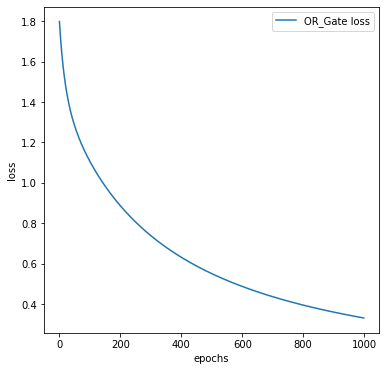

 x and y weights : (array([4.24738579]), array([4.13296153]))


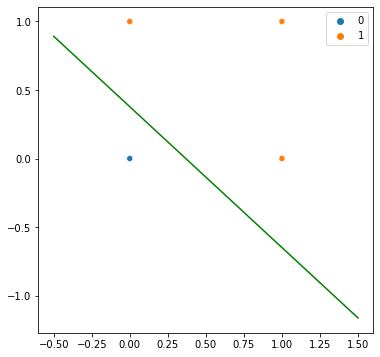

In [448]:
OR_numpy.draw_graph()

## AND data

In [462]:
AND_numpy = numpy_logistic(AND_data, 'OR_Gate')
AND_numpy.prepare_data()

100%|██████████| 1000/1000 [00:00<00:00, 25986.37it/s]


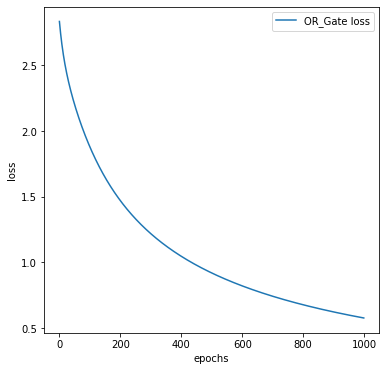

 x and y weights : (array([3.03137977]), array([3.02741025]))


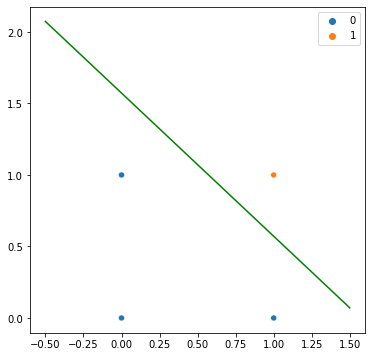

In [450]:
loss = AND_numpy.train_regressor(BCE_Loss, Sigmoid_python, Sigmoid_BCE_Grad, lr = 1e-1, epochs = 1000)
AND_numpy.draw_graph()

## XOR Data

100%|██████████| 1000/1000 [00:00<00:00, 31030.99it/s]


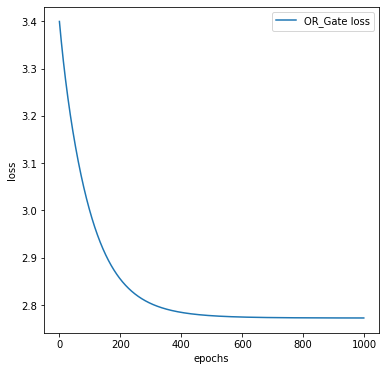

 x and y weights : (array([0.01395081]), array([0.0194995]))


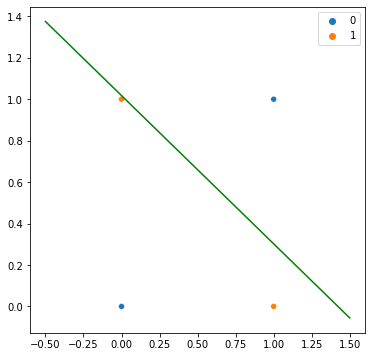

In [451]:
XOR_numpy = numpy_logistic(XOR_data, 'OR_Gate')
XOR_numpy.prepare_data()
loss = XOR_numpy.train_regressor(BCE_Loss, Sigmoid_python, Sigmoid_BCE_Grad, lr = 1e-1, epochs = 1000)
XOR_numpy.draw_graph()

We can see here that for OR and AND data , the graph got converged but XOR it didn't got separate , because of the fact that ***XOR is not linearly separable*** 

# Question - 2

## Data preparation

In [452]:
iris_data = datasets.load_iris()
print(f" Features in iris dataset : {iris_data.keys()}")

 Features in iris dataset : dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [453]:
iris_data['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [454]:
iris_x = iris_data['data']
iris_y = iris_data['target']
one_hot_iris = np.array([[0,0,0] for x in iris_y])

In [455]:
# one hot encoding of the iris data
for i,x in enumerate(iris_y): one_hot_iris[i][x] = 1

In [456]:
iris_x.shape

(150, 4)

In [457]:
one_hot_iris.shape

(150, 3)

In [458]:
iris_combined_data = [iris_x,one_hot_iris]

In [459]:
np.array([[1,1,1],[2,2,2],[3,3,3]]) 

array([[1, 1, 1],
       [2, 2, 2],
       [3, 3, 3]])

## Classification

In [464]:
Multinomila_classifier = numpy_logistic(iris_combined_data, 'Iris')
Multinomila_classifier.prepare_data(iris=True, normalize=False)
loss = Multinomila_classifier.train_regressor(Cross_Entropy_Loss, softmax_python,  Softmax_CE_Grad, lr = 1e-1, epochs = 1000)

100%|██████████| 1000/1000 [00:00<00:00, 1584.88it/s]


We can use both normalized and non - normalized , version by changing the parameter `normalized = True / False`

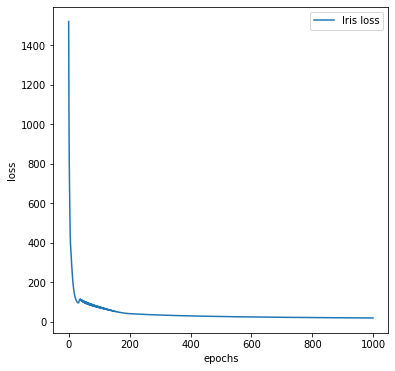

 Accuracy of our current classifier is : 98.00 %


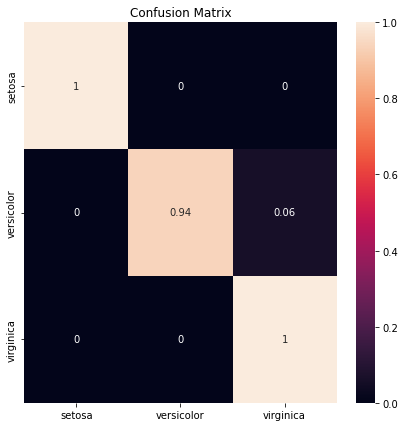

In [465]:
Multinomila_classifier.draw_graph()